In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialization parameters
d = 1000
n = 100000
K = 32

In [3]:
# initialize and fill sparse matrix J
J = np.zeros((n,d))
for i in range(n):
    for _ in range(10):
        if np.random.random() < 0.5:
            sigma = 1
        else:
            sigma = 100
        j = np.random.randint(d)
        J[i,j] = np.random.normal(scale=sigma)

In [4]:
x = np.ones(d)
alpha = 1e-4
iterations = 1000
sgd_l = np.zeros(iterations)
sgd_l_hat = np.zeros(iterations)
print(np.linalg.norm(x))

for it in range(1, iterations):
    i_k = np.random.randint(0,n,K)
    g = 0
    for k in range(K):
        g += np.dot(np.dot(J[i_k[k]], x), np.transpose(J[i_k[k]]))
    g /= K
    Jx = np.dot(J, x)
    sgd_l[it] = np.dot(np.transpose(Jx), Jx) / (2*n)
    for k in range(K):
        sgd_l_hat[it] += np.dot(J[i_k[k]], x)**2
    sgd_l_hat[it] /= (2*K)
    x -= alpha*g
    print(it, ":", np.linalg.norm(x))

31.622776601683793
1 : 31.518383623786878
2 : 31.324800890972213
3 : 31.177685720219568
4 : 31.033017557707822
5 : 30.947140711995097
6 : 30.791154835726488
7 : 30.665805020303395
8 : 30.545441345515066
9 : 30.430914155856684
10 : 30.294762208634296
11 : 30.109729520820697
12 : 29.99245232129573
13 : 29.83819654686114
14 : 29.7025157536236
15 : 29.590709296614758
16 : 29.5075445767341
17 : 29.424334454391033
18 : 29.318134608916182
19 : 29.223658445574536
20 : 29.07071144472395
21 : 28.839009513191026
22 : 28.709304937094245
23 : 28.57161608826085
24 : 28.433739049457493
25 : 28.312888651539293
26 : 28.240645274421215
27 : 28.093465761797702
28 : 27.987086772504057
29 : 27.864714596548023
30 : 27.714617877360922
31 : 27.55404356065501
32 : 27.37624431718092
33 : 27.25562268450116
34 : 27.13552752100386
35 : 26.984512779576225
36 : 26.888233955867275
37 : 26.82680384510958
38 : 26.68956520987637
39 : 26.608466212799954
40 : 26.490567018826145
41 : 26.35549713720873
42 : 26.2346799685152

339 : 7.16682965090264
340 : 7.136557694942066
341 : 7.115176092051922
342 : 7.0970241812366535
343 : 7.079942579224735
344 : 7.0605402118971385
345 : 7.037588150922086
346 : 7.02419867707227
347 : 6.992419365598832
348 : 6.963480051861405
349 : 6.936700601701921
350 : 6.905397852068916
351 : 6.888342598765971
352 : 6.8619211626229974
353 : 6.845189044892125
354 : 6.8190459286001595
355 : 6.802538446413407
356 : 6.77024702915208
357 : 6.759407132646157
358 : 6.733175142635143
359 : 6.705427510886364
360 : 6.685901346858676
361 : 6.645793896916558
362 : 6.62065564566797
363 : 6.6012557003381165
364 : 6.579944273228799
365 : 6.554761045000085
366 : 6.535272966531756
367 : 6.489008109911346
368 : 6.46312877230877
369 : 6.432258489739005
370 : 6.403944740773857
371 : 6.369765301370503
372 : 6.338503666329397
373 : 6.310595567079049
374 : 6.274459814259348
375 : 6.257358017616265
376 : 6.241464799474268
377 : 6.211779861154566
378 : 6.182075055180504
379 : 6.154246241859036
380 : 6.12804422

680 : 1.6904548027917194
681 : 1.685470353571273
682 : 1.6770463847194015
683 : 1.6656468599877063
684 : 1.6605481928249544
685 : 1.6533792743101976
686 : 1.6480939428203472
687 : 1.6412711433758045
688 : 1.6349998279761608
689 : 1.6293710485971828
690 : 1.6165350873142572
691 : 1.6116476885073625
692 : 1.602907006110475
693 : 1.594451064556883
694 : 1.588849979916836
695 : 1.5840192754197846
696 : 1.578054509082247
697 : 1.5692877725003223
698 : 1.5631249407068588
699 : 1.557521952956356
700 : 1.549971704806759
701 : 1.546869709599559
702 : 1.5407013099824969
703 : 1.5332801688410325
704 : 1.5277327076646001
705 : 1.5220987762836113
706 : 1.5159354990156584
707 : 1.508506190597334
708 : 1.5035051148799474
709 : 1.4976532018438051
710 : 1.4894886377072176
711 : 1.48086826055786
712 : 1.476163234805731
713 : 1.4712242644739308
714 : 1.4672207034222207
715 : 1.4587247879384375
716 : 1.4554129935977338
717 : 1.450215311192081
718 : 1.443793359180885
719 : 1.4370142668369694
720 : 1.429964

<function matplotlib.pyplot.show(*args, **kw)>

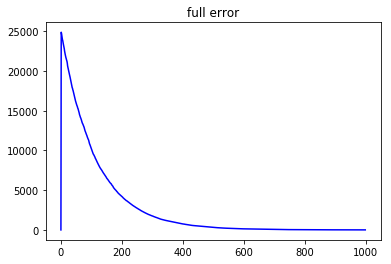

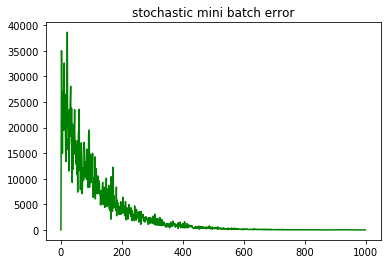

In [5]:
plt.figure()
plt.title('full error')
plt.plot(sgd_l, color='blue')
plt.show

plt.figure()
plt.title('stochastic mini batch error')
plt.plot(sgd_l_hat, color='green')
plt.show

In [9]:
x = np.ones(d)
iterations = 1000
adam_l = np.zeros(iterations)
adam_l_hat = np.zeros(iterations)

m = np.zeros(d)
v = np.zeros(d)
alpha = 1e-2
epsilon = 1e-8
b1 = 0.9
b2 = 0.999
print(np.linalg.norm(x))

for t in range(1, iterations):
    i_k = np.random.randint(0,n,K)
    g = 0
    for k in range(K):
        g += np.dot(np.dot(J[i_k[k]], x), np.transpose(J[i_k[k]]))
    g /= K
    
    m = b1 * m + (1-b1) * g
    v = b2 * v + (1-b2) * g**2
    m_hat = m/(1-b1**t)
    v_hat = v/(1-b2**t)
    
    Jx = np.dot(J, x)
    adam_l[t] = np.dot(np.transpose(Jx), Jx) / (2*n)
    for k in range(K):
        adam_l_hat[t] += np.dot(J[i_k[k]], x)**2
    adam_l_hat[t] /= (2*K)
    
    x -= alpha*m_hat/(np.sqrt(v_hat) + epsilon)
    
    print(t, ":", np.linalg.norm(x))

31.622776601683793
1 : 31.604873042240733
2 : 31.58288825920041
3 : 31.560941534759326
4 : 31.53796500704136
5 : 31.511465732119408
6 : 31.48063823460606
7 : 31.44604551067121
8 : 31.411681930019192
9 : 31.37849199505006
10 : 31.34372984555536
11 : 31.306947582953754
12 : 31.270777671231187
13 : 31.2349012949749
14 : 31.197462028932847
15 : 31.15983436166256
16 : 31.12334459096575
17 : 31.08509966773081
18 : 31.04481302753238
19 : 31.004389604073552
20 : 30.9612759365019
21 : 30.918131416247526
22 : 30.87452388617873
23 : 30.830504150555928
24 : 30.786922689150256
25 : 30.74295344921809
26 : 30.698782709060325
27 : 30.655090823481277
28 : 30.61098769372061
29 : 30.568843235319818
30 : 30.52754532479119
31 : 30.487023404994947
32 : 30.446622905939616
33 : 30.40633850500631
34 : 30.365591475211296
35 : 30.324876563353875
36 : 30.28581034758368
37 : 30.244905448045056
38 : 30.202609929205092
39 : 30.160506918475217
40 : 30.11882121777504
41 : 30.077685147018293
42 : 30.03612397949243
43 :

339 : 18.169777179170428
340 : 18.133576702060807
341 : 18.09830894779061
342 : 18.064615783231954
343 : 18.030538097666224
344 : 17.997247280409834
345 : 17.963905865652226
346 : 17.928848378085775
347 : 17.8939649946499
348 : 17.85892702117137
349 : 17.82467304409888
350 : 17.791062015106068
351 : 17.755022314787976
352 : 17.718441901093613
353 : 17.681968363559577
354 : 17.64644428185311
355 : 17.611088000939933
356 : 17.575965460968163
357 : 17.542485952930313
358 : 17.507756680310017
359 : 17.470334682790497
360 : 17.43317461501015
361 : 17.395796723140037
362 : 17.359233282501684
363 : 17.322611498423395
364 : 17.28559586905293
365 : 17.248432531842035
366 : 17.210592983692166
367 : 17.17173748132311
368 : 17.133291975065926
369 : 17.095042437558526
370 : 17.054841849154194
371 : 17.01259490736648
372 : 16.971397960437894
373 : 16.9317668260735
374 : 16.893662522824993
375 : 16.855627282378546
376 : 16.818231964495116
377 : 16.781970793216153
378 : 16.744883641052223
379 : 16.709

674 : 8.770336971822323
675 : 8.748149157876197
676 : 8.726711488424293
677 : 8.704738344184273
678 : 8.682521931812522
679 : 8.660932890963648
680 : 8.63826607863853
681 : 8.61685006667606
682 : 8.5950953236721
683 : 8.573536043947358
684 : 8.552079928638644
685 : 8.531057486070885
686 : 8.510539321999955
687 : 8.490538334058543
688 : 8.470865929029664
689 : 8.450901867669012
690 : 8.431321914037893
691 : 8.41240958649187
692 : 8.393112736943221
693 : 8.373571752647416
694 : 8.354629531187035
695 : 8.336077288861835
696 : 8.317668106226536
697 : 8.299226455254235
698 : 8.279555794724146
699 : 8.259781621957679
700 : 8.239875394738393
701 : 8.219012971672155
702 : 8.198700888620676
703 : 8.178217806030126
704 : 8.15825626908417
705 : 8.137505964408179
706 : 8.116832557242098
707 : 8.096175960520371
708 : 8.075581159717306
709 : 8.054887914782073
710 : 8.034748369490387
711 : 8.01549119015898
712 : 7.995817758725375
713 : 7.976225650979179
714 : 7.955763589975227
715 : 7.935207277357155

<function matplotlib.pyplot.show(*args, **kw)>

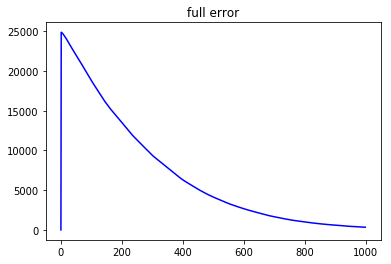

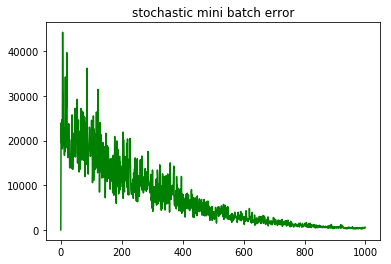

In [10]:
plt.figure()
plt.title('full error')
plt.plot(adam_l, color='blue')
plt.show

plt.figure()
plt.title('stochastic mini batch error')
plt.plot(adam_l_hat, color='green')
plt.show